In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mpld3
import numpy as np
import pandas as pd
import csv
from mpld3 import plugins

mpld3.enable_notebook()

In [2]:
species_list = []
species_index = []

df = pd.read_csv("AllBirdsv4.csv")
df_test = pd.read_csv("Test Birds Location.csv")

#df = df.dropna(axis=0, how="any")
df = df.replace('?', None)
# Date A revoir
for element in ["Y", "Time"]:
    df[element] = df[element].str.replace("?", "None")
    if element == "Time":
        df[element] = df[element].str.replace('am', '')
        df[element] = df[element].str.replace('pm', '')
        df = df[df[element].str.contains(':')]

species_list = df["English_name"].unique()
for element in df["English_name"]:
    species_index.append(species_list.tolist().index(element))
        
# print(df.dtypes)
df["Birds index"] = species_index
print(df_test)


    ID    X    Y
0    1  140  119
1    2   63  153
2    3   70  136
3    4   78  150
4    5   60   90
5    6  126  103
6    7   71  121
7    8   78   62
8    9   61  145
9   10   45   39
10  11  132  106
11  12   61   20
12  13   35  160
13  14   40  125
14  15  110  121


KeyError: 'X'

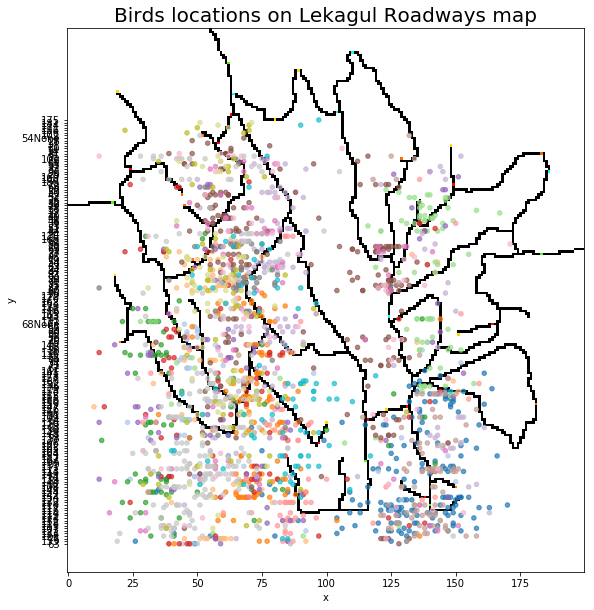

In [3]:
img = mpimg.imread('Lekagul Roadways 2018.bmp')
img = img[::-1] # reverse order for y-axis so that (0,0) is bottom-left

fig = plt.figure(figsize=(10,10))

map_plot = fig.add_subplot()
plt.imshow(img, origin='lower')
plt.title('Birds locations on Lekagul Roadways map', size=20)
plt.xlabel('x')
plt.ylabel('y')
cmap = plt.get_cmap('tab20')

# plot all birds
# scatter_all_birds = plt.scatter([coord[1] for coord in coord_list], [coord[2] for coord in coord_list],
#                                 s=20, alpha=0.7, c=cmap([coord[0] for coord in coord_list]))
scatter_all_birds = plt.scatter(df["X"], df["Y"], s=20, alpha=0.7, c=cmap(df["Birds index"]))

# plot the 15 "test birds"
# scatter_test_birds = plt.scatter([coord[0] for coord in coord_test_list], [coord[1] for coord in coord_test_list], 
#                                  s=300, c='red', marker='^')
scatter_test_birds = plt.scatter(df_test["X"], df_test["Y"], s=300, c='red', marker='^')

# # create labels
# labels = []
# for i in range(len(coord_test_list)):
#     labels.append("Test Bird {} ({}, {})".format(i+1, coord_test_list[i][0], coord_test_list[i][1]))
    
# # tooltip shown on mouse hover over data points
# tooltip_test_birds = plugins.PointLabelTooltip(scatter_test_birds, labels=labels)
# tooltip_all_birds = plugins.PointLabelTooltip(scatter_all_birds, labels=[species_list[c[0]] for c in coord_list])
# plugins.connect(fig, tooltip_test_birds)
# plugins.connect(fig, tooltip_all_birds)

mpld3.display(fig)